In [ ]:
using Plots

## レナードジョーンズポテンシャル
は
$$\frac{1}{r^{12}} -\frac{2}{r^6}$$
ここで係数は $r=1$ のときに最小値1になるように設定した。(下図参照)

また距離$r$の粒子間に働く力の $i$成分は
$$ 12 \left(
        \frac{1}{r^{14}}-\frac{1}{r^8}
    \right) x_i $$
$X_i$ は 距離ベクトルの$i$成分
    
    

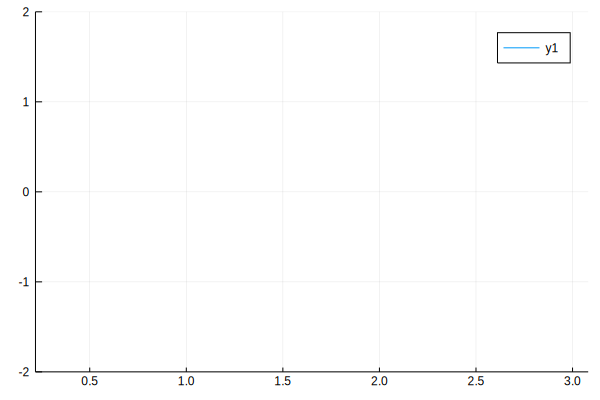

In [2]:
function LJ(r:: Float64)
    return (1/r^12 - 2/r^6) 
end

x = .3:.001:3
plot(x,LJ.(x), ylim = (-2,2))

In [3]:
function LJ(r:: Float64)
    return (1/r^12 - 2/r^6) 
end

# 微分形
function LJforce(r::Float64)
    return 12*(1/r^14-1/r^8)
end

function force(x,y,N)
    ax = Vector{Float64}(undef,N)
    ay = Vector{Float64}(undef,N)
    
    ax .= 0
    ay .= 0
    
    for i in 1:N-1
        for j in i+1:N
            ll = sqrt((x[j]-x[i])^2 + (y[j]-y[i])^2 )
            FLJ = LJforce(ll)
            
            ax[i] -= FLJ * (x[j]-x[i])
            ax[j] += FLJ * (x[j]-x[i])
            ay[i] -= FLJ * (y[j]-y[i])
            ay[j] += FLJ * (y[j]-y[i])
        end
    end
    
    return ax, ay
end

function ルンゲクッタ(x,y,u,v,N;
        T=20., dt=1e-3)
    
    numStep = length(0:dt:T)
    
    xlist = Array{Float64,2}(undef,N,numStep)
    ylist = Array{Float64,2}(undef,N,numStep)
    ulist = Array{Float64,2}(undef,N,numStep)
    vlist = Array{Float64,2}(undef,N,numStep)
        
    for (i,t) in enumerate(0:dt:T)
        # リストに書き込む
        xlist[:,i] = x
        ylist[:,i] = y
        ulist[:,i] = u
        vlist[:,i] = v
        
        # 微小変化の計算
        # k1
        dx1 = u
        dy1 = v
        du1, dv1 = force(x,y,N)
        
        # k2
        x1 = x .+ .5dt.*dx1 
        y1 = y .+ .5dt.*dy1
        u1 = u .+ .5dt.*du1
        v1 = v .+ .5dt.*dv1
        
        dx2 = u1
        dy2 = v1
        du2, dv2 = force(x1,y1,N) 
        
        # k3
        x2 = x .+ .5dt.*dx2 
        y2 = y .+ .5dt.*dy2
        u2 = u .+ .5dt.*du2
        v2 = v .+ .5dt.*dv2
        
        dx3 = u2
        dy3 = v2
        du3, dv3 = force(x2,y2,N)
        
        # k4
        x3 = x + dt*dx3 
        y3 = y + dt*dy3
        u3 = u + dt*du3
        v3 = v + dt*dv3
        
        dx4 = u3
        dy4 = v3
        du4, dv4 = force(x3,y3,N)
        
        # がっちゃんこ
        x += dt*(dx1 + 2dx2 + 2dx3 + dx4)/6. 
        y += dt*(dy1 + 2dy2 + 2dy3 + dy4)/6.
        u += dt*(du1 + 2du2 + 2du3 + du4)/6.
        v += dt*(dv1 + 2dv2 + 2dv3 + dv4)/6.
        
  end
  return 0:dt:T, xlist, ylist, ulist, vlist
end

ルンゲクッタ (generic function with 1 method)

# 2D 正方格子に配置

In [4]:
# 1辺 M 粒子の正方格子
function Square_lattice_2D(M)
  
  x = Vector{Float64}(undef, M^2)
  y = copy(x)
  I = 0
  for i in 1:M
    for j in 1:M
      I += 1
      x[I] = j 
      y[I] = i
    end
  end
  return x,y
end

Square_lattice_2D (generic function with 1 method)

## 計算メイン部分

In [5]:

M = 11
x,y = Square_lattice_2D(M)
x[1] = 1

# 速度成分入力にも出力にもいらないのでは?
u = zeros(Float64,M^2)
v = copy(u)

@time tl,xl,yl,ul,vl = ルンゲクッタ(x, y, u, v, M^2;T=50,dt=1e-2);

  7.268589 seconds (1.87 M allocations: 344.239 MiB, 0.73% gc time)


## (ファイル出力)

In [6]:
skip = 10
@time anim = @animate for i in 1:skip:length(tl)
  scatter(xl[:,i], yl[:,i],xlims=(-1,M+2), ylims=(-1,M+2), markersize = 10,
  aspect_ratio=:equal, legend=:none, size=(400,400))
  end;



 19.270428 seconds (260.75 M allocations: 5.299 GiB, 4.47% gc time)


以下の セルを実行すれば アニメーションが出力されるが同時にローカルのパスが見えるので自粛(対応策募集中)  
計算結果は君の目で確かめて見てほしい。

In [ ]:
gif(anim , "nanka.gif")

# 改善点
出力が計算の10倍以上かかるの納得行かねぇ……